In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1=pd.read_csv("credit_risk_dataset.csv")
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df1["loan_status"].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

# The dataset is clearly imbalanced hence we need to resort to IMBLEARN in later part of the analysis

In [4]:
df1.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
df1.shape

(32581, 12)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
df1["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [9]:
df1[df1["person_emp_length"].isna()]["person_age"].value_counts()

23    115
22    114
24     94
25     85
26     57
21     51
30     50
28     49
27     43
29     41
31     32
33     24
32     20
34     18
35     14
36     14
38     11
40     10
39     10
37      9
44      7
43      7
41      7
47      3
42      3
48      1
50      1
49      1
51      1
70      1
56      1
53      1
Name: person_age, dtype: int64

In [10]:
EMP=df1[(df1["person_home_ownership"]=="RENT")|(df1["person_home_ownership"]=="MORTGAGE")][(df1["person_age"]==23)|(df1["person_age"]==22)]["person_emp_length"].mean()

C:\Users\PRATIM\AppData\Local\Temp\ipykernel_10196\3731365653.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  EMP=df1[(df1["person_home_ownership"]=="RENT")|(df1["person_home_ownership"]=="MORTGAGE")][(df1["person_age"]==23)|(df1["person_age"]==22)]["person_emp_length"].mean()


In [11]:
[df1["person_age"]<=df1[df1["person_emp_length"].isna()]["person_age"].mean()]

[0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 32576    False
 32577    False
 32578    False
 32579    False
 32580    False
 Name: person_age, Length: 32581, dtype: bool]

In [12]:
EMP

3.7962466487935655

In [13]:
df1["person_emp_length"].fillna(EMP,inplace=True)

In [14]:
df1.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
df1[df1["loan_int_rate"].isna()]["loan_intent"].value_counts()

MEDICAL              620
EDUCATION            599
VENTURE              566
DEBTCONSOLIDATION    509
PERSONAL             507
HOMEIMPROVEMENT      315
Name: loan_intent, dtype: int64

In [16]:
df1[df1["loan_int_rate"].isna()]["loan_grade"].value_counts()

B    1056
A    1003
C     630
D     312
E      83
F      27
G       5
Name: loan_grade, dtype: int64

In [17]:
df1[df1["loan_int_rate"].isna()]["loan_amnt"].mean()

9633.119383825417

In [18]:
avg=df1[(df1["loan_intent"]=="MEDICAL")&(df1["loan_grade"]=="B")&(df1["loan_int_rate"].isna())]["loan_amnt"].mean()

In [19]:
INT=df1["loan_int_rate"].mean()/df1["loan_amnt"].mean()*avg

In [20]:
INT

11.217464174090983

In [21]:
df1["loan_int_rate"].fillna(INT,inplace=True)

In [22]:
df1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [23]:
cat=df1[["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]]
cont=df1[["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]]

In [24]:
df2=pd.get_dummies(df1,list(cat.columns))
df2.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_amnt                       32581 non-null  int64  
 4   loan_int_rate                   32581 non-null  float64
 5   loan_status                     32581 non-null  int64  
 6   loan_percent_income             32581 non-null  float64
 7   cb_person_cred_hist_length      32581 non-null  int64  
 8   person_home_ownership_MORTGAGE  32581 non-null  uint8  
 9   person_home_ownership_OTHER     32581 non-null  uint8  
 10  person_home_ownership_OWN       32581 non-null  uint8  
 11  person_home_ownership_RENT      32581 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

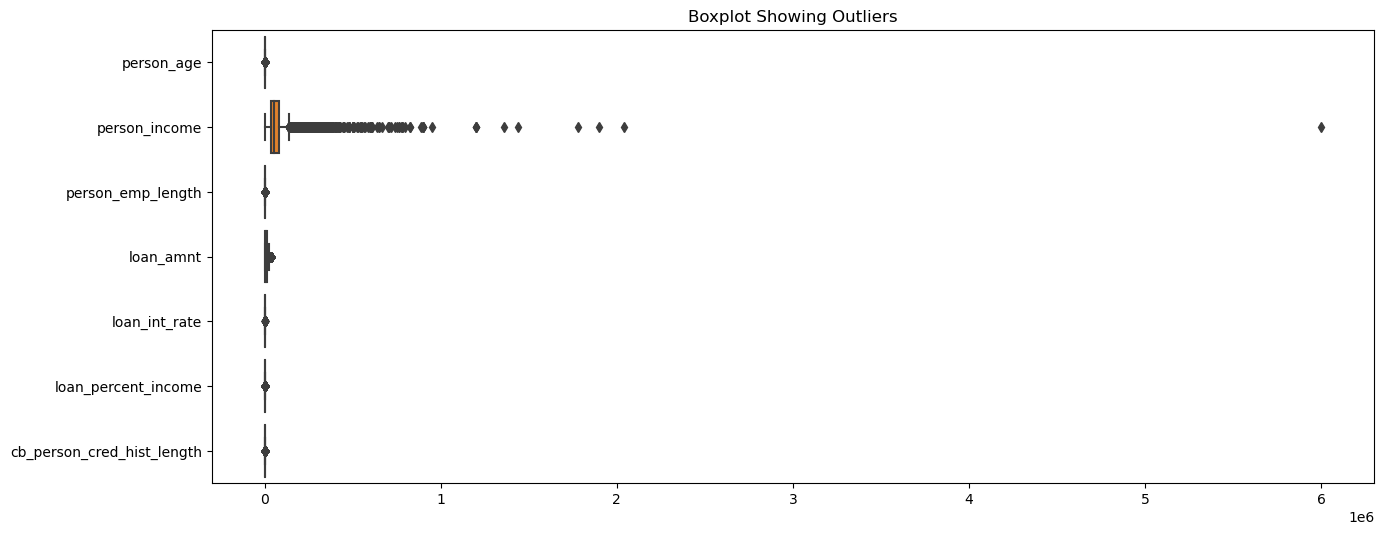

In [26]:
plt.figure(figsize=(15,6),dpi=100)
sns.boxplot(data=df2[["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]],orient='h')
plt.title("Boxplot Showing Outliers")

plt.show()

In [27]:
quantile1,quantile3=np.percentile(df2["person_age"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

40.5 12.5


In [28]:
for i in range(0,len(df2["person_age"])):
    if df2.loc[i,"person_age"]>upperbound:
               df2.loc[i,"person_age"]=upperbound
    elif df2.loc[i,"person_age"]<lowerbound:
               df2.loc[i,"person_age"]=lowerbound
               

In [29]:
quantile1,quantile3=np.percentile(df2["person_income"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

140250.0 -22550.0


In [30]:
for i in range(0,len(df2["person_income"])):
    if df2.loc[i,"person_income"]>upperbound:
               df2.loc[i,"person_income"]=upperbound
    elif df2.loc[i,"person_income"]<lowerbound:
               df2.loc[i,"person_income"]=lowerbound

In [31]:
quantile1,quantile3=np.percentile(df2["person_emp_length"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

14.5 -5.5


In [32]:
for i in range(0,len(df2["person_emp_length"])):
    if df2.loc[i,"person_emp_length"]>upperbound:
               df2.loc[i,"person_emp_length"]=upperbound
    elif df2.loc[i,"person_emp_length"]<lowerbound:
               df2.loc[i,"person_emp_length"]=lowerbound

In [33]:
quantile1,quantile3=np.percentile(df2["loan_amnt"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

23000.0 -5800.0


In [34]:
for i in range(0,len(df2["loan_amnt"])):
    if df2.loc[i,"loan_amnt"]>upperbound:
               df2.loc[i,"loan_amnt"]=upperbound
    elif df2.loc[i,"loan_amnt"]<lowerbound:
               df2.loc[i,"loan_amnt"]=lowerbound

In [35]:
quantile1,quantile3=np.percentile(df2["loan_int_rate"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

20.04 1.5600000000000014


In [36]:
for i in range(0,len(df2["loan_int_rate"])):
    if df2.loc[i,"loan_int_rate"]>upperbound:
               df2.loc[i,"loan_int_rate"]=upperbound
    elif df2.loc[i,"loan_int_rate"]<lowerbound:
               df2.loc[i,"loan_int_rate"]=lowerbound

In [37]:
quantile1,quantile3=np.percentile(df2["loan_percent_income"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

0.44000000000000006 -0.12000000000000002


In [38]:
for i in range(0,len(df2["loan_percent_income"])):
    if df2.loc[i,"loan_percent_income"]>upperbound:
               df2.loc[i,"loan_percent_income"]=upperbound
    elif df2.loc[i,"loan_percent_income"]<lowerbound:
               df2.loc[i,"loan_percent_income"]=lowerbound

In [39]:
quantile1,quantile3=np.percentile(df2["cb_person_cred_hist_length"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

15.5 -4.5


In [40]:
for i in range(0,len(df2["cb_person_cred_hist_length"])):
    if df2.loc[i,"cb_person_cred_hist_length"]>upperbound:
               df2.loc[i,"cb_person_cred_hist_length"]=upperbound
    elif df2.loc[i,"cb_person_cred_hist_length"]<lowerbound:
               df2.loc[i,"cb_person_cred_hist_length"]=lowerbound

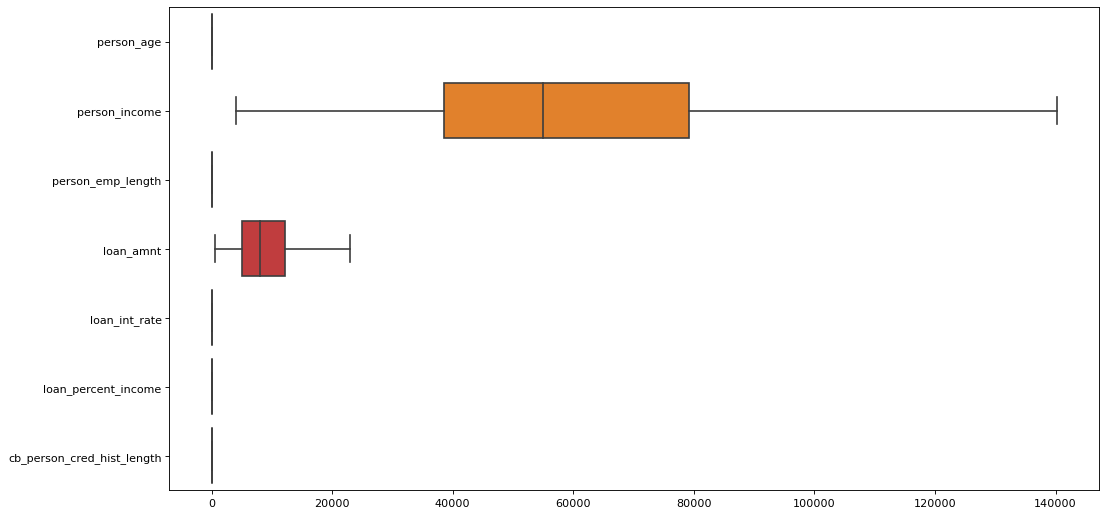

In [41]:
plt.figure(figsize=(15,8),dpi=80)
sns.boxplot(data=df2[["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]],orient='h')

plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
cont_sc=sc.fit_transform(cont)
print(pd.DataFrame(cont_sc))

              0         1         2         3         4         5         6
0      0.016129  0.009173  1.000000  1.000000  0.595506  0.710843  0.035714
1      0.008065  0.000934  0.040650  0.014493  0.321348  0.120482  0.000000
2      0.040323  0.000934  0.008130  0.144928  0.418539  0.686747  0.035714
3      0.024194  0.010257  0.032520  1.000000  0.551124  0.638554  0.000000
4      0.032258  0.008406  0.065041  1.000000  0.497191  0.662651  0.071429
...         ...       ...       ...       ...       ...       ...       ...
32576  0.298387  0.008172  0.008130  0.153623  0.434831  0.132530  1.000000
32577  0.274194  0.019346  0.032520  0.496377  0.116292  0.180723  0.607143
32578  0.362903  0.012008  0.024390  1.000000  0.312921  0.554217  0.928571
32579  0.290323  0.024350  0.040650  0.420290  0.340449  0.120482  0.857143
32580  0.370968  0.006338  0.016260  0.173188  0.256742  0.180723  1.000000

[32581 rows x 7 columns]


In [43]:
df2["person_age"]=pd.DataFrame(cont_sc)[0]
df2["person_income"]=pd.DataFrame(cont_sc)[1]
df2["person_emp_length"]=pd.DataFrame(cont_sc)[2]
df2["loan_amnt"]=pd.DataFrame(cont_sc)[3]
df2["loan_int_rate"]=pd.DataFrame(cont_sc)[4]
df2["loan_percent_income"]=pd.DataFrame(cont_sc)[5]
df2["cb_person_cred_hist_length"]=pd.DataFrame(cont_sc)[6]

In [44]:
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.016129,0.009173,1.000000,1.000000,0.595506,1,0.710843,0.035714,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.008065,0.000934,0.040650,0.014493,0.321348,0,0.120482,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.040323,0.000934,0.008130,0.144928,0.418539,1,0.686747,0.035714,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.024194,0.010257,0.032520,1.000000,0.551124,1,0.638554,0.000000,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.032258,0.008406,0.065041,1.000000,0.497191,1,0.662651,0.071429,0,0,...,0,0,0,1,0,0,0,0,0,1


In [45]:
from scipy.stats import chi2_contingency

In [46]:
df2.drop(['person_home_ownership_OTHER','person_home_ownership_OWN','person_home_ownership_RENT','loan_intent_EDUCATION','loan_intent_HOMEIMPROVEMENT','loan_intent_MEDICAL','loan_intent_PERSONAL','loan_intent_VENTURE','loan_grade_B','loan_grade_C','loan_grade_D','loan_grade_E','loan_grade_F','loan_grade_G','cb_person_default_on_file_Y'],axis=1, inplace=True)

In [47]:
df2.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'loan_intent_DEBTCONSOLIDATION', 'loan_grade_A',
       'cb_person_default_on_file_N'],
      dtype='object')

In [48]:
categ=list(df2.columns[8:])

In [49]:
categ

['person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_grade_A',
 'cb_person_default_on_file_N']

In [50]:
l1=[]
for pred in categ:
    Crosstab=pd.crosstab(index=df2["loan_status"],columns=df2[pred])
    Chi2result=chi2_contingency(Crosstab)
    if Chi2result[1] < 0.05:
        l1.append(pred)
        
print(l1)
    

['person_home_ownership_MORTGAGE', 'loan_intent_DEBTCONSOLIDATION', 'loan_grade_A', 'cb_person_default_on_file_N']


In [51]:
df2.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'loan_intent_DEBTCONSOLIDATION', 'loan_grade_A',
       'cb_person_default_on_file_N'],
      dtype='object')

In [52]:
from scipy.stats import f_oneway

In [53]:
cont=df2[["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate",'loan_percent_income','cb_person_cred_hist_length']]

In [54]:
list(cont.columns)

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [55]:
l2=[]
for pred in list(cont.columns):
    lists=df2.groupby("loan_status")[pred].apply(list)
    AnovaResult=f_oneway(*lists)
    if AnovaResult[1]<0.05:
        l2.append(pred)
        
print(l2)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [56]:
l1.extend(l2)
print(l1)

['person_home_ownership_MORTGAGE', 'loan_intent_DEBTCONSOLIDATION', 'loan_grade_A', 'cb_person_default_on_file_N', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [57]:
len(l1)

11

In [58]:
x=df2[l1]

In [59]:
y=df2[["loan_status"]]

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=20,stratify=y)

In [62]:
x_train

,person_home_ownership_MORTGAGE,loan_intent_DEBTCONSOLIDATION,loan_grade_A,cb_person_default_on_file_N,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5780,1,0,0,1,0.016129,0.007088,0.008130,0.101449,0.292135,0.108434,0.035714
3743,0,0,0,1,0.016129,0.003536,0.008130,0.101449,0.325700,0.192771,0.000000
4128,0,1,0,1,0.048387,0.001835,0.000000,0.112319,0.408427,0.349398,0.071429
3742,1,0,0,0,0.016129,0.004705,0.024390,0.217391,0.452247,0.301205,0.071429
18894,0,0,0,1,0.072581,0.002335,0.024390,0.034783,0.320225,0.108434,0.285714
...,...,...,...,...,...,...,...,...,...,...,...
23869,1,0,1,1,0.120968,0.010434,0.089431,0.107246,0.020787,0.072289,0.285714
27798,0,0,0,1,0.096774,0.094797,0.130081,0.449275,0.243820,0.036145,0.107143
28383,1,0,0,0,0.064516,0.021187,0.000000,0.275362,0.445506,0.096386,0.178571
22639,1,0,1,1,0.072581,0.008756,0.105691,0.413043,0.325700,0.313253,0.214286


In [63]:
lr=LogisticRegression(random_state=0,max_iter=1000000,fit_intercept=True)

In [64]:
lr.fit(x_train,y_train.values.ravel())

LogisticRegression(max_iter=1000000, random_state=0)

In [65]:
y_pred=lr.predict(x_test)

In [66]:
y_test["loan_status"].value_counts()

0    7642
1    2133
Name: loan_status, dtype: int64

In [67]:
y_train["loan_status"].value_counts()

0    17831
1     4975
Name: loan_status, dtype: int64

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

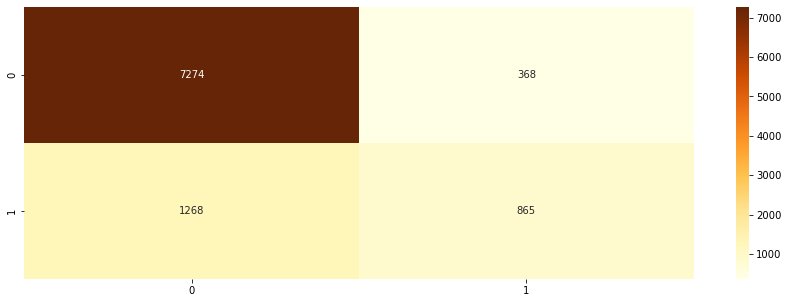

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7642
           1       0.70      0.41      0.51      2133

    accuracy                           0.83      9775
   macro avg       0.78      0.68      0.71      9775
weighted avg       0.82      0.83      0.81      9775



In [69]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test.values,y_pred),annot=True,cmap="YlOrBr",fmt='d')
plt.show()
print(classification_report(y_test.values,y_pred))

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state=0)

In [71]:
clf.fit(x_train,y_train.values.ravel())

RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7642
           1       0.86      0.63      0.73      2133

    accuracy                           0.90      9775
   macro avg       0.88      0.80      0.83      9775
weighted avg       0.89      0.90      0.89      9775



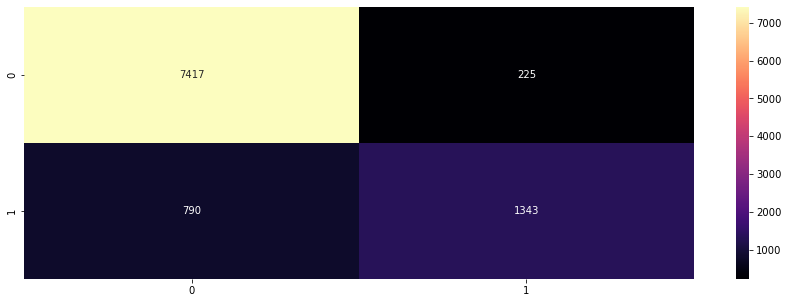

In [72]:
ans=clf.predict(x_test)
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test.values,ans),annot=True,fmt='d',cmap='magma')
print(classification_report(y_test.values,ans))

# As discussed earlier that we need imbalanced laerning technique since our models are having a low recall value for category '1'.

In [73]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=0,sampling_strategy=0.5)
x_res,y_res=os.fit_resample(x,y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=20)

In [74]:
y_test["loan_status"].value_counts()

0    7734
1    3729
Name: loan_status, dtype: int64

In [75]:
y_train["loan_status"].value_counts()

0    17739
1     9007
Name: loan_status, dtype: int64

In [76]:
lr.fit(x_train,y_train.values.ravel())
y_pred=lr.predict(x_test)

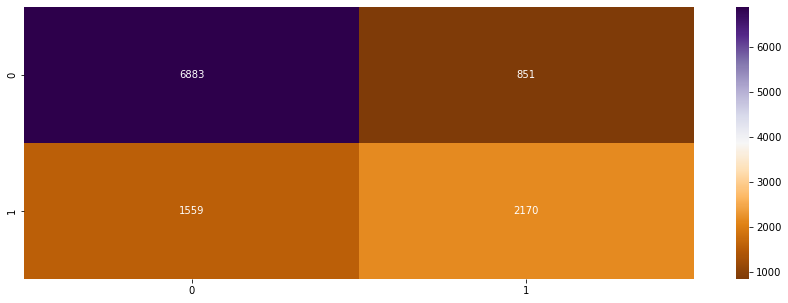

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7734
           1       0.72      0.58      0.64      3729

    accuracy                           0.79     11463
   macro avg       0.77      0.74      0.75     11463
weighted avg       0.78      0.79      0.78     11463



In [77]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test.values,y_pred),annot=True,cmap="PuOr",fmt='d')
plt.show()
print(classification_report(y_test.values,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7734
           1       0.91      0.86      0.88      3729

    accuracy                           0.93     11463
   macro avg       0.92      0.91      0.91     11463
weighted avg       0.93      0.93      0.93     11463



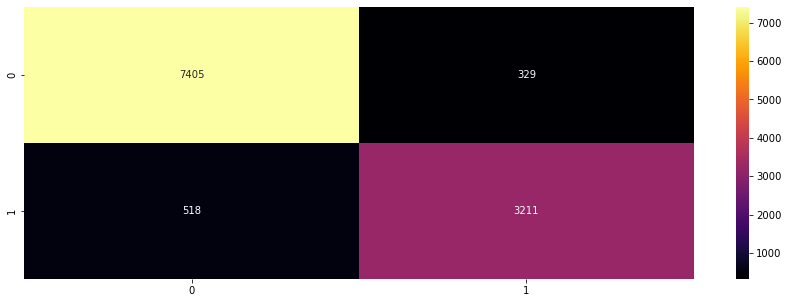

In [78]:
clf.fit(x_train,y_train.values.ravel())
ans=clf.predict(x_test)
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_test.values,ans),annot=True,fmt='d',cmap='inferno')
print(classification_report(y_test.values,ans))

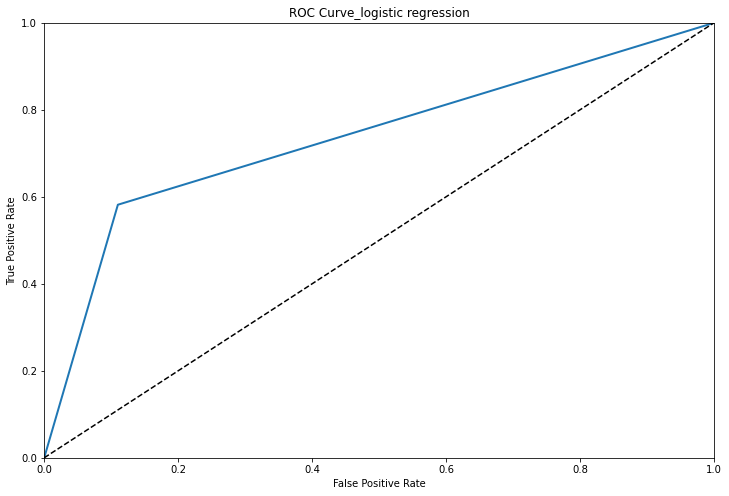

In [79]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve_logistic regression')

fpr, tpr, thresholds = roc_curve(y_test.values, y_pred)
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show()

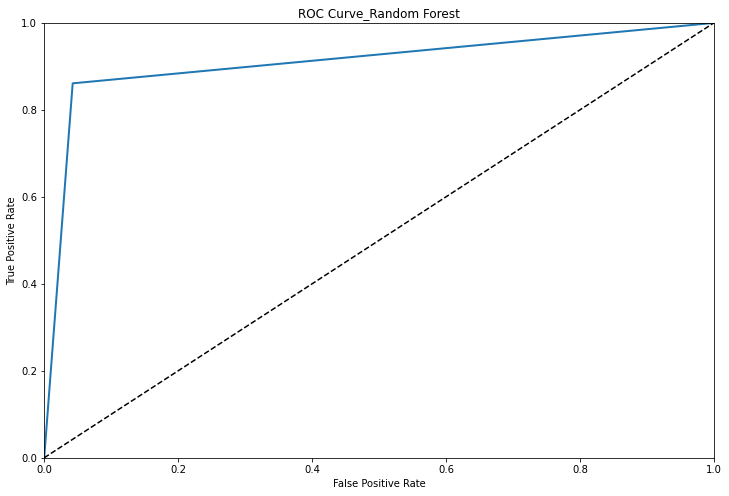

In [80]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve_Random Forest')

fpr, tpr, thresholds = roc_curve(y_test.values, ans)
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show()